# Defect Prediction in Truck Air Systems

In this project, data science techniques were applied to optimize the maintenance planning for a transportation company's truck fleet, specifically focusing on the air system. The main goal was to reduce maintenance costs related to this system, which had increased significantly despite the fleet size remaining constant.

Historical data from truck air systems will be analyzed and pre-processed before training and evaluating several models.

## Data Science Applied to Maintenance Planning Optimization

### Situation

A newly established data science consulting firm has been engaged to enhance and optimize the maintenance planning for an outsourced transportation company. This company operates a fleet of trucks that delivers goods across the country. Despite maintaining a relatively constant fleet size over the past three years, there has been a significant rise in maintenance expenses related to the air systems of these vehicles. 

During the initial alignment meeting with the project stakeholders and the company's IT team, several key pieces of information were provided:

- The technical team will supply all relevant data regarding the air system of the trucks. However, due to contractual and bureaucratic reasons, all data columns have been encoded.
- It was noted that, due to the company's recent digitization efforts, some data may be missing from the provided database.
- The source of the information is the company's maintenance sector, where a column labeled "class" was created. In this column, "pos" denotes trucks with air system defects, while "neg" indicates trucks with defects in systems other than the air system.

The project stakeholders are eager to see results and have outlined the following main requirements for a technical proof of concept:

- Can AI techniques reduce our expenses related to this type of maintenance?
- Can we identify the key factors that predict potential failures in the air system?

Addressing these requirements is crucial to persuading the executive board to adopt these methods and apply them to other maintenance systems in the upcoming year.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Loading data
df_previous_years = pd.read_csv('air_system_previous_years.csv')

In [3]:
# df information
print(df_previous_years.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None


In [4]:
df_previous_years.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Identifying Non-Numeric Values
Before replacing specific values, it is important to understand which non-numeric values are present in the columns. As previously mentioned, 'na' represents the missing values in the dataframe. Therefore:

In [5]:
# select columns
object_columns = df_previous_years.select_dtypes(include=['object']).columns

# check non-numeric values
def find_non_numeric_values(column):
    try:
        pd.to_numeric(df_previous_years[column])
    except ValueError:
        non_numeric_values = df_previous_years[column][pd.to_numeric(df_previous_years[column], errors='coerce').isna()].unique()
        print(f"Column '{column}' contains non-numeric values: {non_numeric_values}")

# apply function
for column in object_columns:
    find_non_numeric_values(column)


Column 'class' contains non-numeric values: ['neg' 'pos']
Column 'ab_000' contains non-numeric values: ['na']
Column 'ac_000' contains non-numeric values: ['na']
Column 'ad_000' contains non-numeric values: ['na']
Column 'ae_000' contains non-numeric values: ['na']
Column 'af_000' contains non-numeric values: ['na']
Column 'ag_000' contains non-numeric values: ['na']
Column 'ag_001' contains non-numeric values: ['na']
Column 'ag_002' contains non-numeric values: ['na']
Column 'ag_003' contains non-numeric values: ['na']
Column 'ag_004' contains non-numeric values: ['na']
Column 'ag_005' contains non-numeric values: ['na']
Column 'ag_006' contains non-numeric values: ['na']
Column 'ag_007' contains non-numeric values: ['na']
Column 'ag_008' contains non-numeric values: ['na']
Column 'ag_009' contains non-numeric values: ['na']
Column 'ah_000' contains non-numeric values: ['na']
Column 'ai_000' contains non-numeric values: ['na']
Column 'aj_000' contains non-numeric values: ['na']
Column

Column 'ee_004' contains non-numeric values: ['na']
Column 'ee_005' contains non-numeric values: ['na']
Column 'ee_006' contains non-numeric values: ['na']
Column 'ee_007' contains non-numeric values: ['na']
Column 'ee_008' contains non-numeric values: ['na']
Column 'ee_009' contains non-numeric values: ['na']
Column 'ef_000' contains non-numeric values: ['na']
Column 'eg_000' contains non-numeric values: ['na']


As observed earlier, except for the 'class' column, which contains 'neg' and 'pos' values, all columns have at least one 'na' value. We will replace these 'na' values with NaN to allow for proper conversion to numeric types. Additionally, we will transform the values in the 'class' column, where 'neg' will be changed to 0 and 'pos' to 1, thus facilitating the use of this data by the model.

In [6]:
# replace 'neg' and 'pos' 
df_previous_years['class'] = df_previous_years['class'].replace({'neg': 0, 'pos': 1})

df_replaced_na = df_previous_years.replace('na', np.nan)

In [7]:
# null values count
df_replaced_na.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

After properly transforming the missing values, we will convert all columns to numeric types, thus allowing the model to be trained.

In [8]:
# Identify type 
object_columns = df_replaced_na.select_dtypes(include=['object']).columns

# Create a new DataFrame with the converted columns after replacement
df_converted = df_replaced_na.copy()

# convert to numeric
def convert_to_numeric(column):
    try:
        return pd.to_numeric(df_converted[column])
    except ValueError:
        return df_converted[column]


for column in object_columns:
    df_converted[column] = convert_to_numeric(column)

# Check data types after conversion
print(df_converted.dtypes)

class       int64
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


## Class Balance

In [9]:
# Checking the value count of the class column
df_converted['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

## Impacts of Class Imbalance on Data Modeling
The DataFrame contains 60,000 rows, of which only 1,000 belong to class 1, while the remaining 59,000 belong to class 0. This extreme class imbalance can pose several challenges and impacts on data modeling.

The main issue with class imbalance is that machine learning models tend to be biased toward the majority class. In our case, a model may simply predict class 0 for most instances and still achieve high overall accuracy. However, this would not be useful, as the accuracy for the minority class (class 1) would be very low. Therefore, it is crucial to ensure that the model is evaluated and optimized to treat both classes equally.

### Evaluation Metrics
Accuracy is not an appropriate metric for imbalanced class problems, as it can be misleading. Instead, metrics such as the confusion matrix, precision, recall, F1-score, and AUC-ROC are more suitable. These metrics help assess the model’s performance on the minority class more effectively.

To handle the imbalance, several techniques can be applied, including SMOTE (Synthetic Minority Over-sampling Technique). This helps provide more examples of the minority class for the model to learn from.

In [10]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(2)
memory usage: 78.3 MB


## Analysis of Missing Values

<AxesSubplot:>

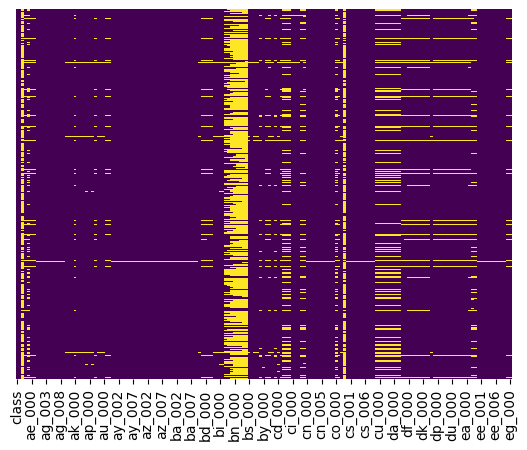

In [11]:
sns.heatmap(df_converted.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [12]:
# Analyze null values
null_counts = df_converted.isnull().sum()
null_proportions = null_counts / len(df_converted)
null_info = pd.DataFrame({'null_count': null_counts, 'null_proportion': null_proportions})

# Sort by proportion of null values in descending order
null_info_sorted = null_info.sort_values(by='null_proportion', ascending=False)

In [13]:
# print info
for column in null_info_sorted.index:
    print(f"Column: {column} | Null Count: {null_info_sorted.loc[column, 'null_count']} | Null Proportion: {null_info_sorted.loc[column, 'null_proportion']:.2f}")

Column: br_000 | Null Count: 49264 | Null Proportion: 0.82
Column: bq_000 | Null Count: 48722 | Null Proportion: 0.81
Column: bp_000 | Null Count: 47740 | Null Proportion: 0.80
Column: bo_000 | Null Count: 46333 | Null Proportion: 0.77
Column: ab_000 | Null Count: 46329 | Null Proportion: 0.77
Column: cr_000 | Null Count: 46329 | Null Proportion: 0.77
Column: bn_000 | Null Count: 44009 | Null Proportion: 0.73
Column: bm_000 | Null Count: 39549 | Null Proportion: 0.66
Column: bl_000 | Null Count: 27277 | Null Proportion: 0.45
Column: bk_000 | Null Count: 23034 | Null Proportion: 0.38
Column: ch_000 | Null Count: 14861 | Null Proportion: 0.25
Column: co_000 | Null Count: 14861 | Null Proportion: 0.25
Column: cg_000 | Null Count: 14861 | Null Proportion: 0.25
Column: cf_000 | Null Count: 14861 | Null Proportion: 0.25
Column: ad_000 | Null Count: 14861 | Null Proportion: 0.25
Column: ct_000 | Null Count: 13808 | Null Proportion: 0.23
Column: cu_000 | Null Count: 13808 | Null Proportion: 0.

### Evaluation of the Proportion of Missing Data in Each Column

Analyzing the proportion of missing values in each column of the DataFrame provides key insights into the quality and completeness of the dataset. Below is a list of the columns, along with the count of missing values and their proportion relative to the total number of records.

#### Columns with a High Proportion of Missing Values (p > 38%)
These columns have a high proportion of missing values, which can significantly affect both the analysis and the performance of machine learning models. They account for 10 columns in the DataFrame, or 5.8%.

#### Columns with a Moderate Proportion of Missing Values (15% < p < 38%)
Columns with a moderate proportion of missing values still require attention, as missing data can distort the results. These correspond to 18 columns in the DataFrame, or 10.5%.

Though the proportion of missing data is moderate, it’s still important to address it to avoid skewing the analysis. Techniques such as imputation or selective removal may be necessary.

#### Columns with a Low Proportion of Missing Values (p < 8%)
These columns have a low proportion of missing values, which simplifies the application of imputation or other methods without causing significant information loss. They represent 143 columns in the DataFrame, or 83.6%.

#### Conclusion
Since the columns with missing values form a minority of the DataFrame, we will proceed by removing them. We will set a maximum threshold for the percentage of missing values allowed per column and remove those that exceed this limit. After the removal, we will reassess the DataFrame to ensure the process was effective.

In [14]:
# Set the threshold to keep only columns with null_proportion less than 26%
threshold = 0.26

# select columns to keep (with proportion of null values ​​below threshold)
columns_to_keep = null_info_sorted[null_info_sorted['null_proportion'] < threshold].index

# Create a new DataFrame with only the selected columns
df_reduced = df_converted[columns_to_keep]

In [15]:
# Calculate the proportion of rows with null values
null_rows_proportion = df_reduced.isnull().any(axis=1).mean()
print(f"Null row proportion: {null_rows_proportion:.2f}")

Null row proportion: 0.31


<AxesSubplot:>

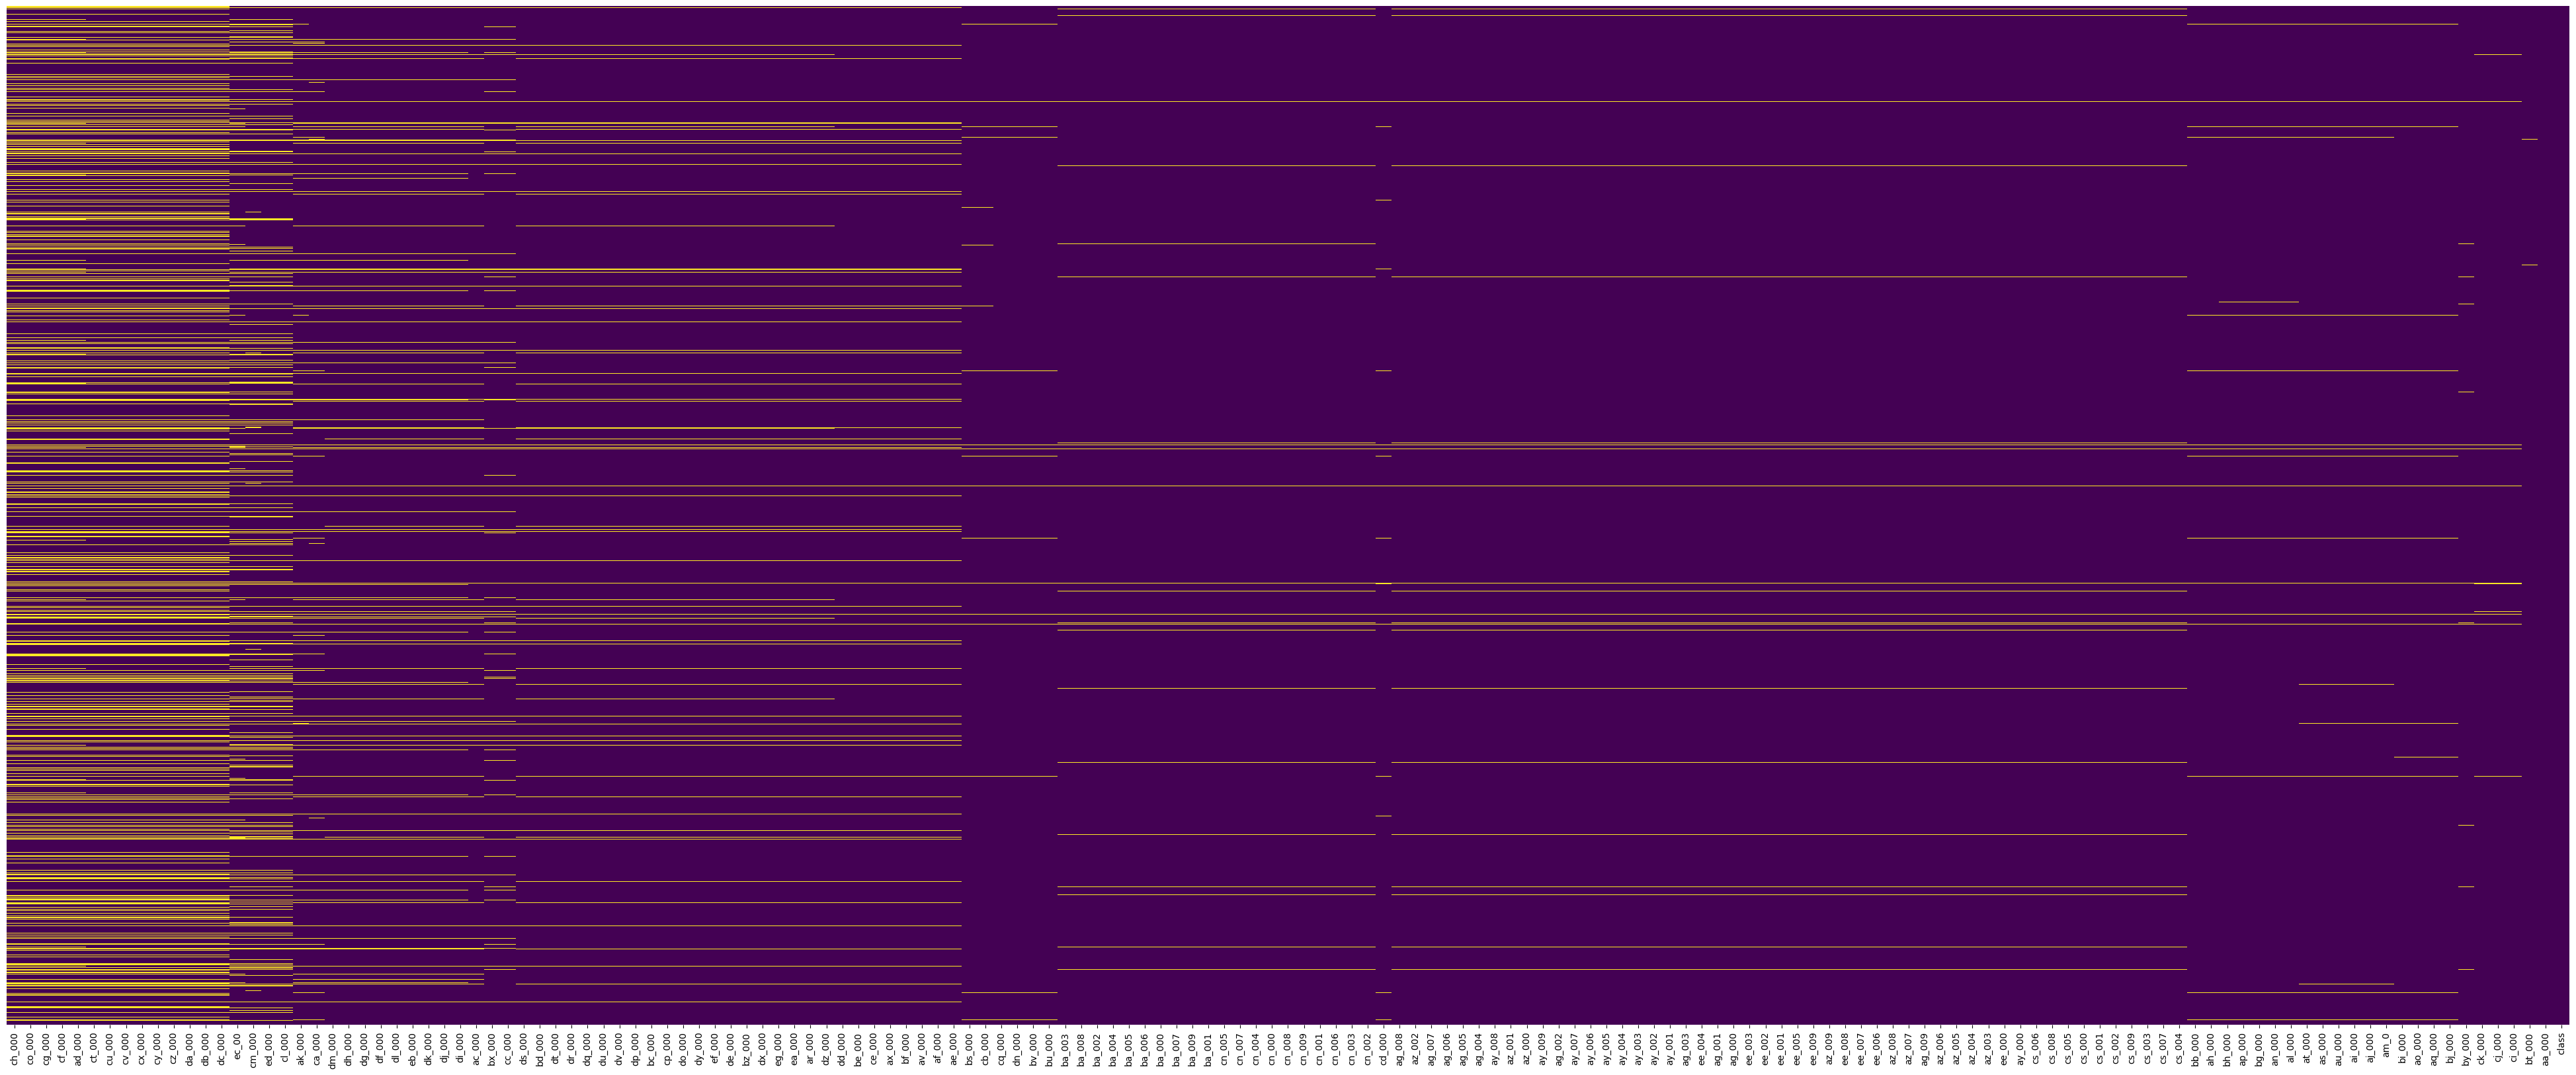

In [16]:
plt.figure(figsize=(50, 20))

# Plot do heatmap for all colunns
sns.heatmap(df_reduced.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are many rows with missing values that need to be addressed. We will focus on the initial columns, which have around 25% missing values, to better understand this issue.

<AxesSubplot:>

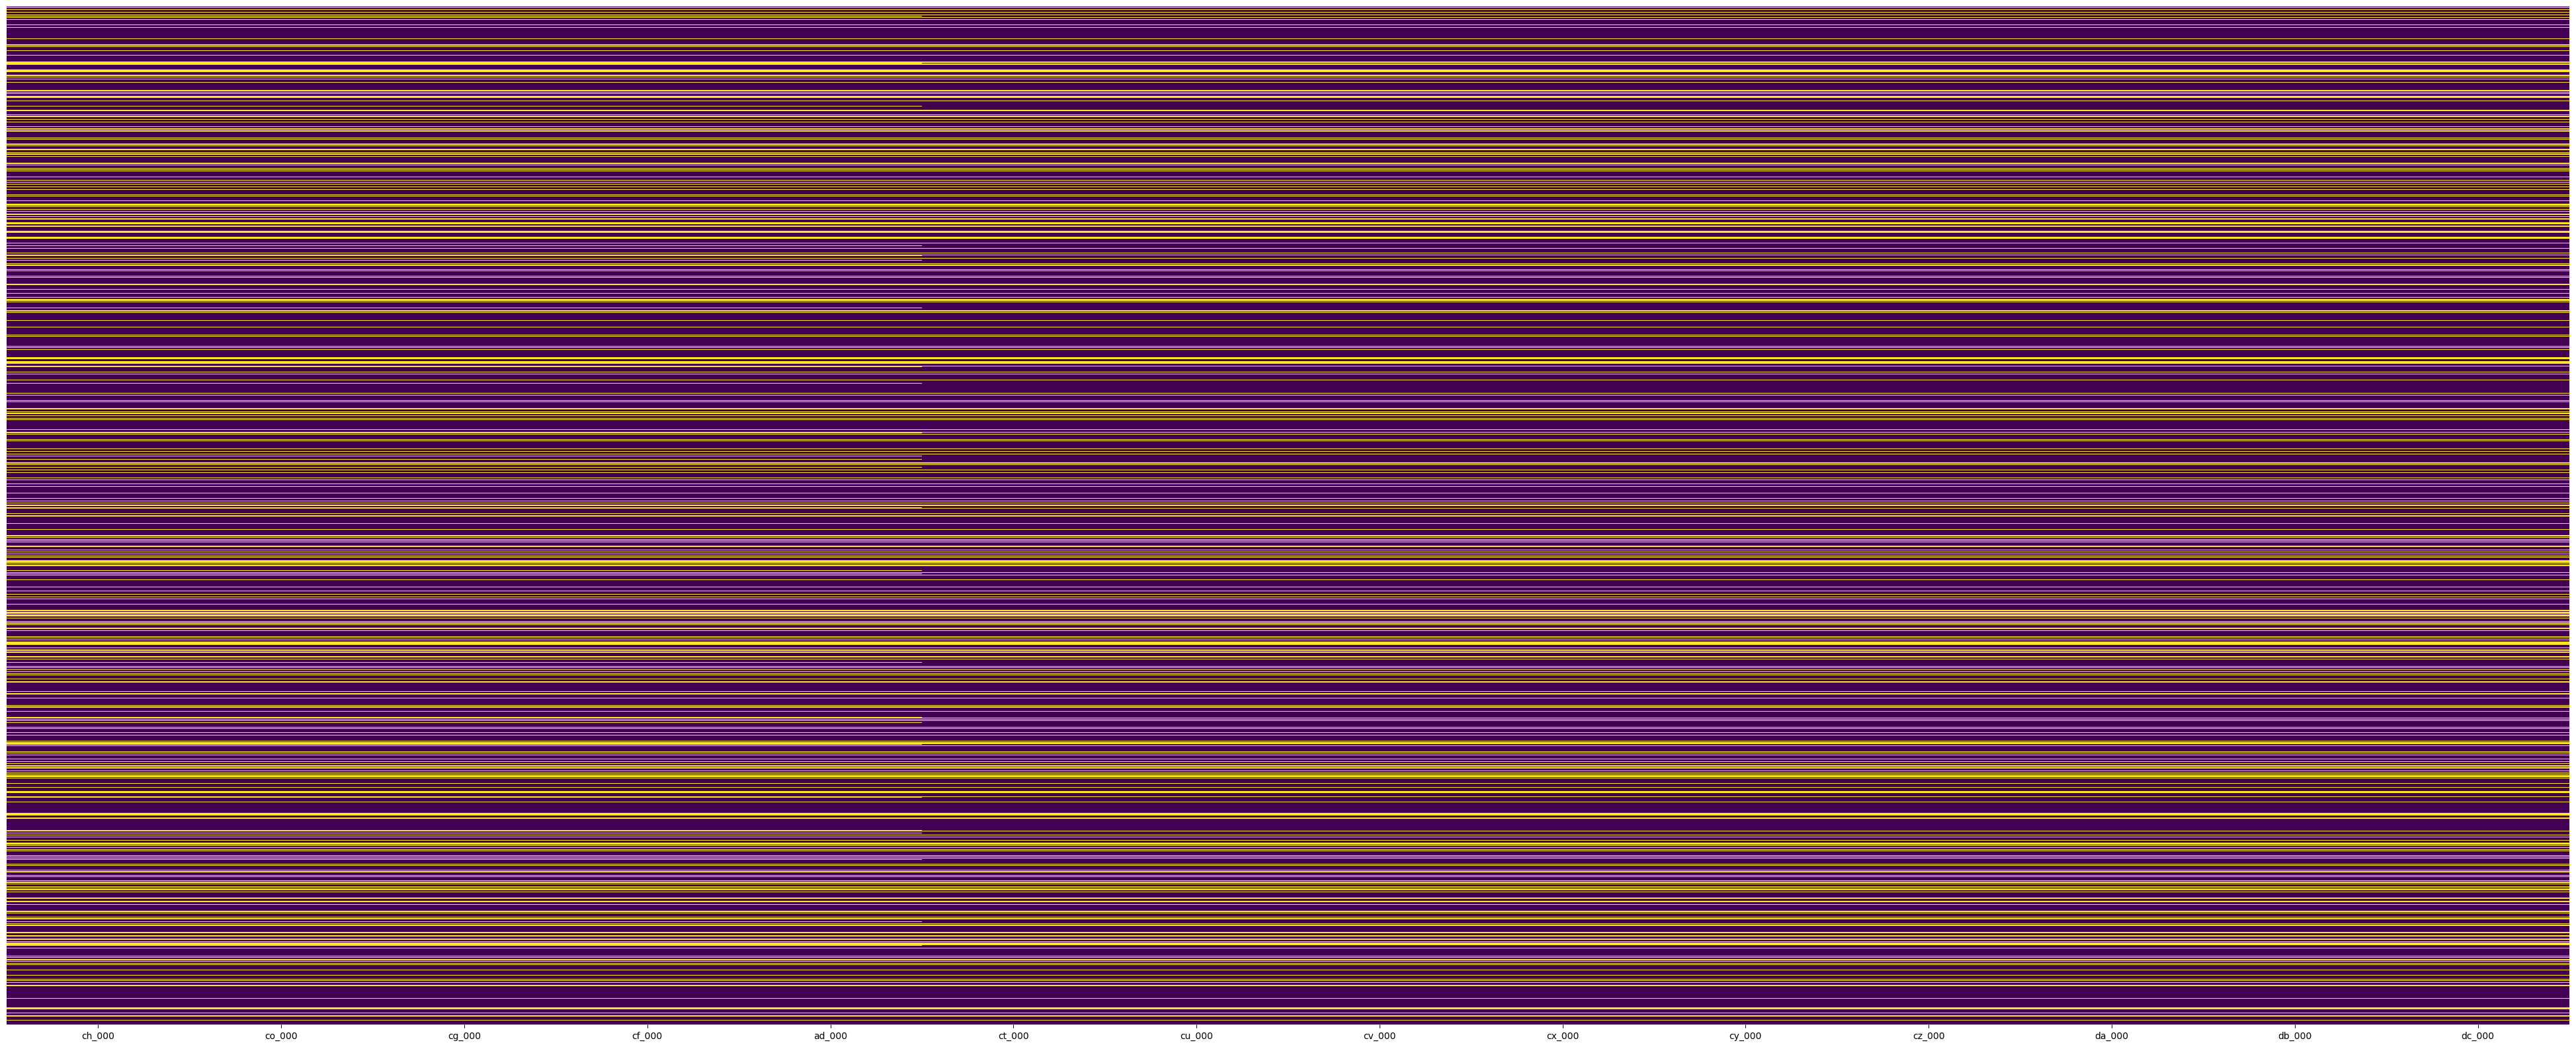

In [17]:
plt.figure(figsize=(50, 20))

sns.heatmap(df_reduced.iloc[:, 0:14].isnull(), yticklabels=False, cbar=False, cmap='viridis')

The missing values in these columns seem to align, meaning that the same rows have missing values across all these columns. To address this, we will remove the rows with a high percentage of missing data. We’ll set a threshold where rows with more than 10% missing values will be removed. After this removal, we will reassess the DataFrame.

In [18]:
# Remove rows with more than 10% null values
threshold = 0.1 * df_reduced.shape[1]  # Calcula o threshold baseado em 10% do número total de colunas
df_no_nulls = df_reduced.dropna(thresh=int(df_reduced.shape[1] - threshold))

# number of rows after removal
print(f"Rows after removing null values {len(df_no_nulls)}")

Rows after removing null values 51311


<AxesSubplot:>

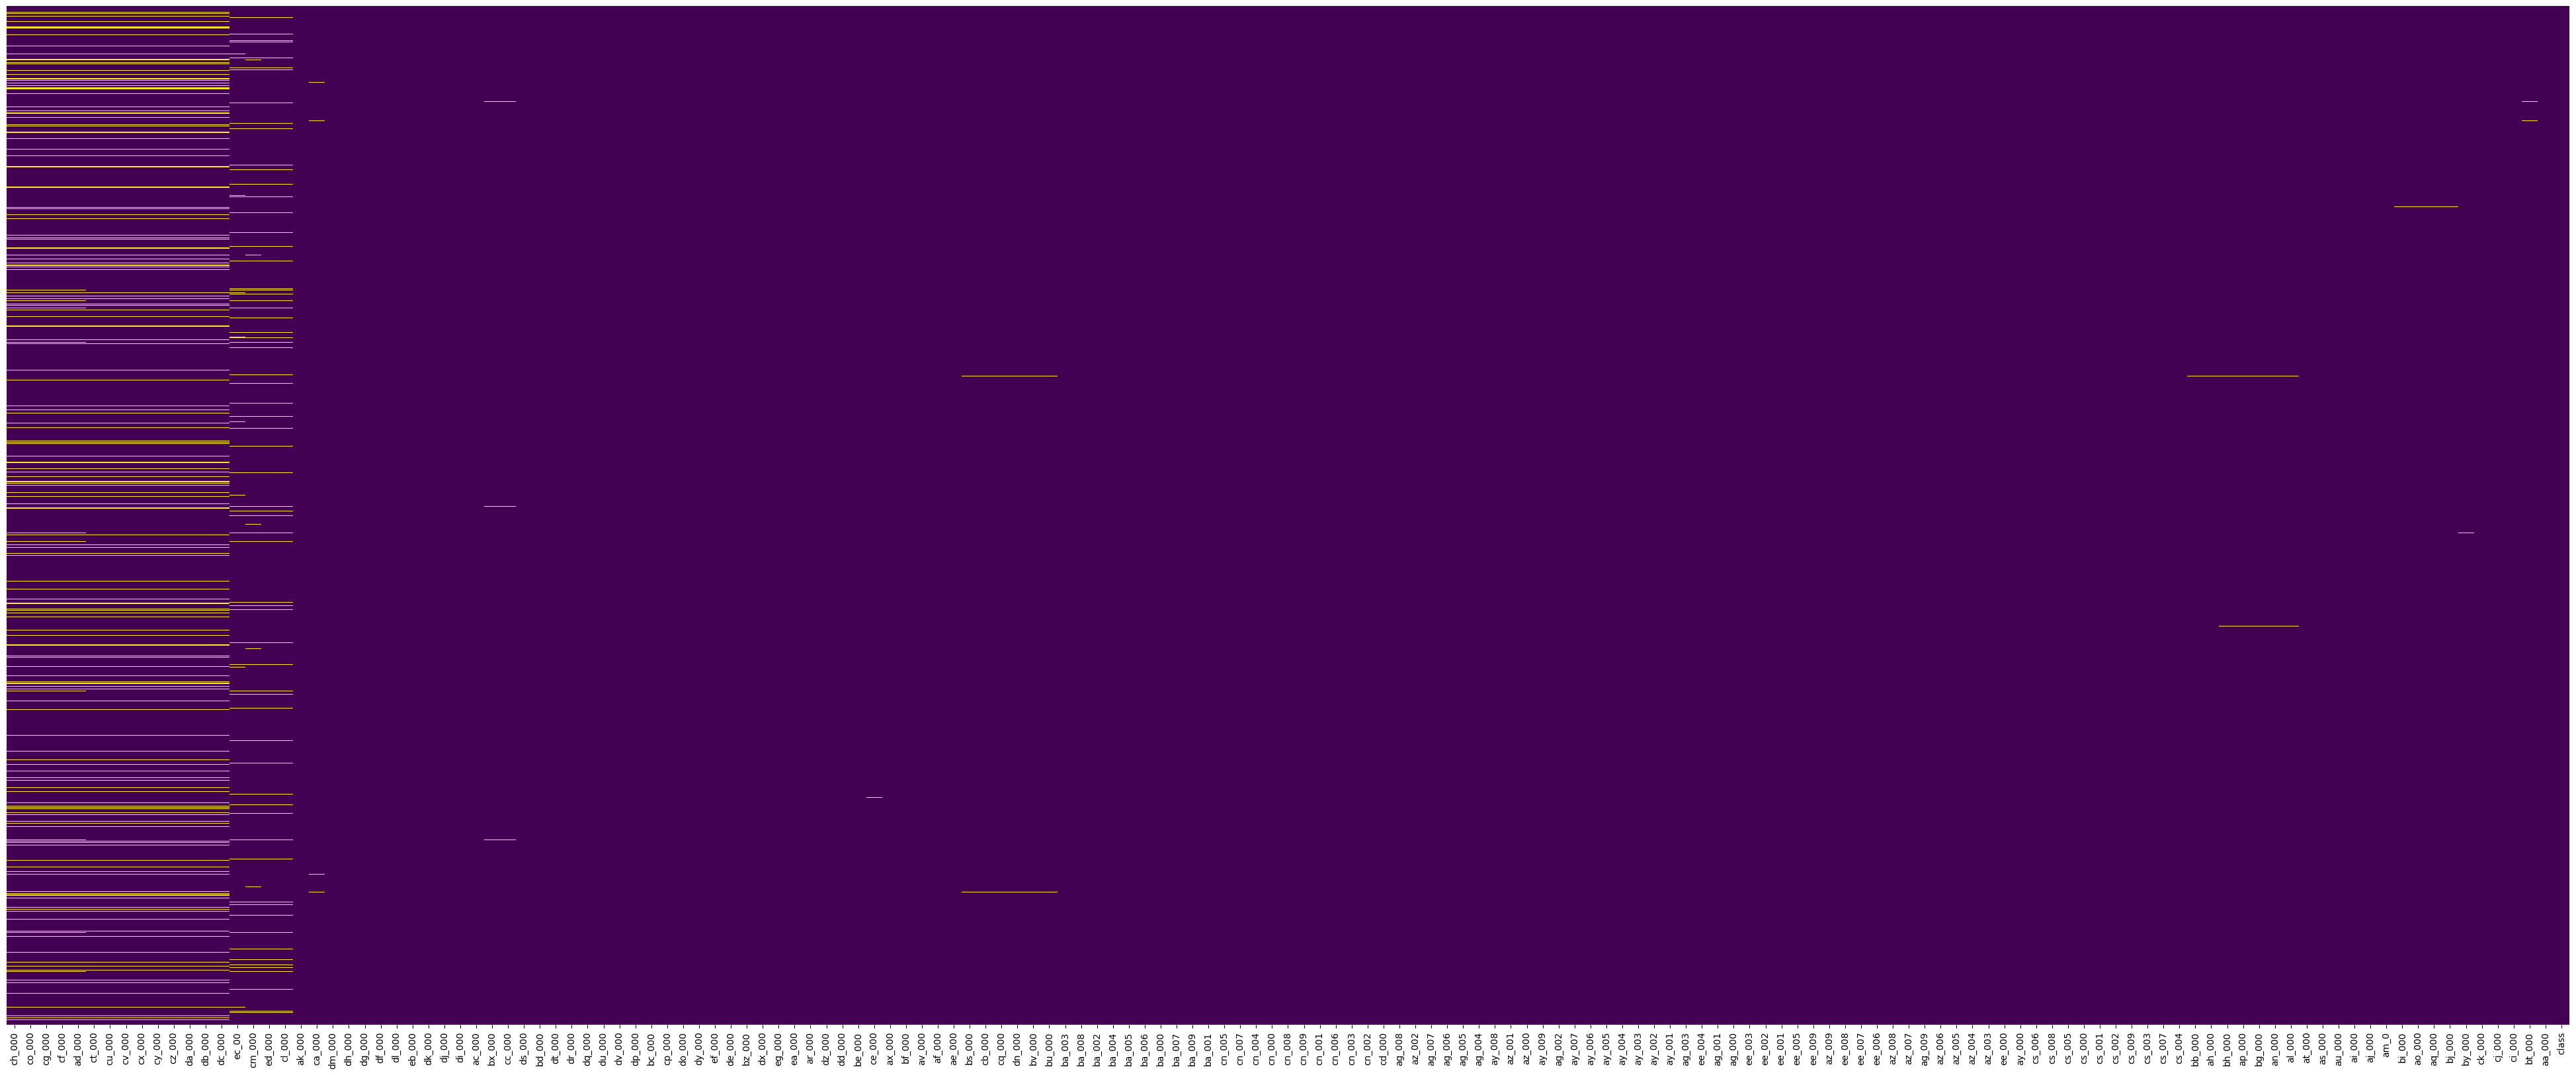

In [19]:
plt.figure(figsize=(50, 20))

# heatmap for all columns
sns.heatmap(df_no_nulls.isnull(), yticklabels=False, cbar=False, cmap='viridis')


The removal of rows with more than 10% missing values resulted in the exclusion of 8,689 rows, representing 14.4% of the original 60,000 rows. Despite this significant reduction, a considerable amount of missing data remains in the first columns. Imputing values without considering the specific distribution of each column, especially with such a high proportion of missing values, could compromise the model's effectiveness. Therefore, we have decided to adjust the threshold and retain only columns with a proportion of missing values below 15%.

In [20]:
# Set the threshold to keep only columns with null_proportion less than 15%
threshold = 0.15

columns_to_keep = null_info_sorted[null_info_sorted['null_proportion'] < threshold].index

df_reduced = df_converted[columns_to_keep]

In [21]:
# Proportion of rows with null values
null_rows_proportion = df_reduced.isnull().any(axis=1).mean()
print(f"Null rows proportion: {null_rows_proportion:.2f}")

Null rows proportion: 0.10


<AxesSubplot:>

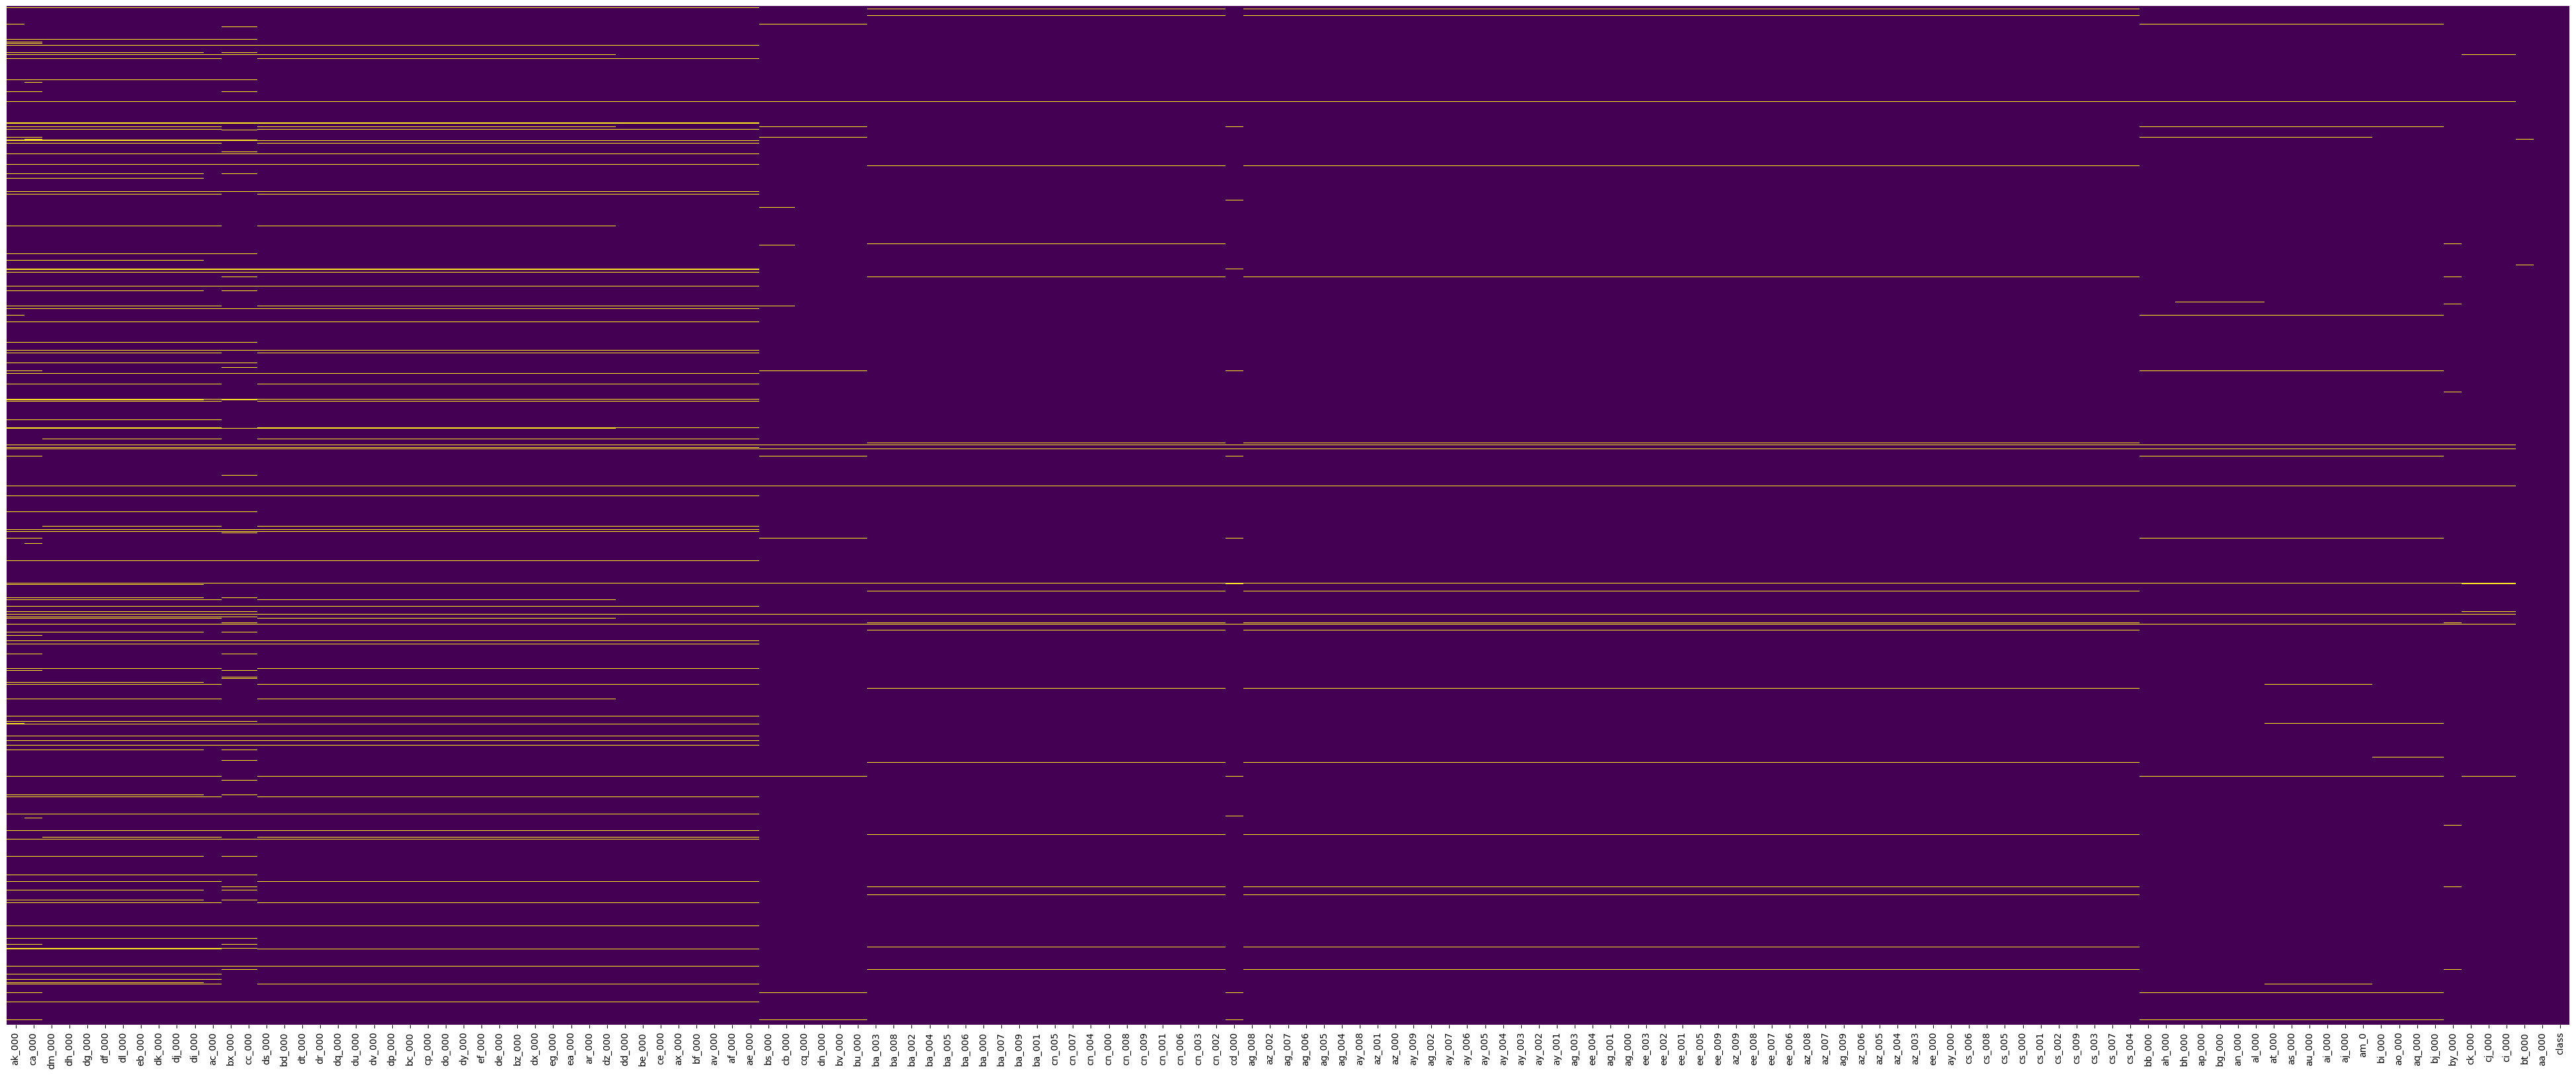

In [22]:
plt.figure(figsize=(50, 20))

# heatmap plot
sns.heatmap(df_reduced.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Currently, the proportion of rows with missing values stands at 10%, and many of these missing values are concentrated in the same rows, as evidenced by the heatmap. To ensure data integrity and simplify the analysis, we will remove these 6,000 rows, resulting in a cleaner dataset with no missing values.

In [23]:
# Remove rows with null values
threshold = df_reduced.shape[1] 
df_no_nulls = df_reduced.dropna(thresh=int(threshold))

# Number of rows after removing null values
print(f"Rows after removing null values: {len(df_no_nulls)}")

Rows after removing null values: 54143


<AxesSubplot:>

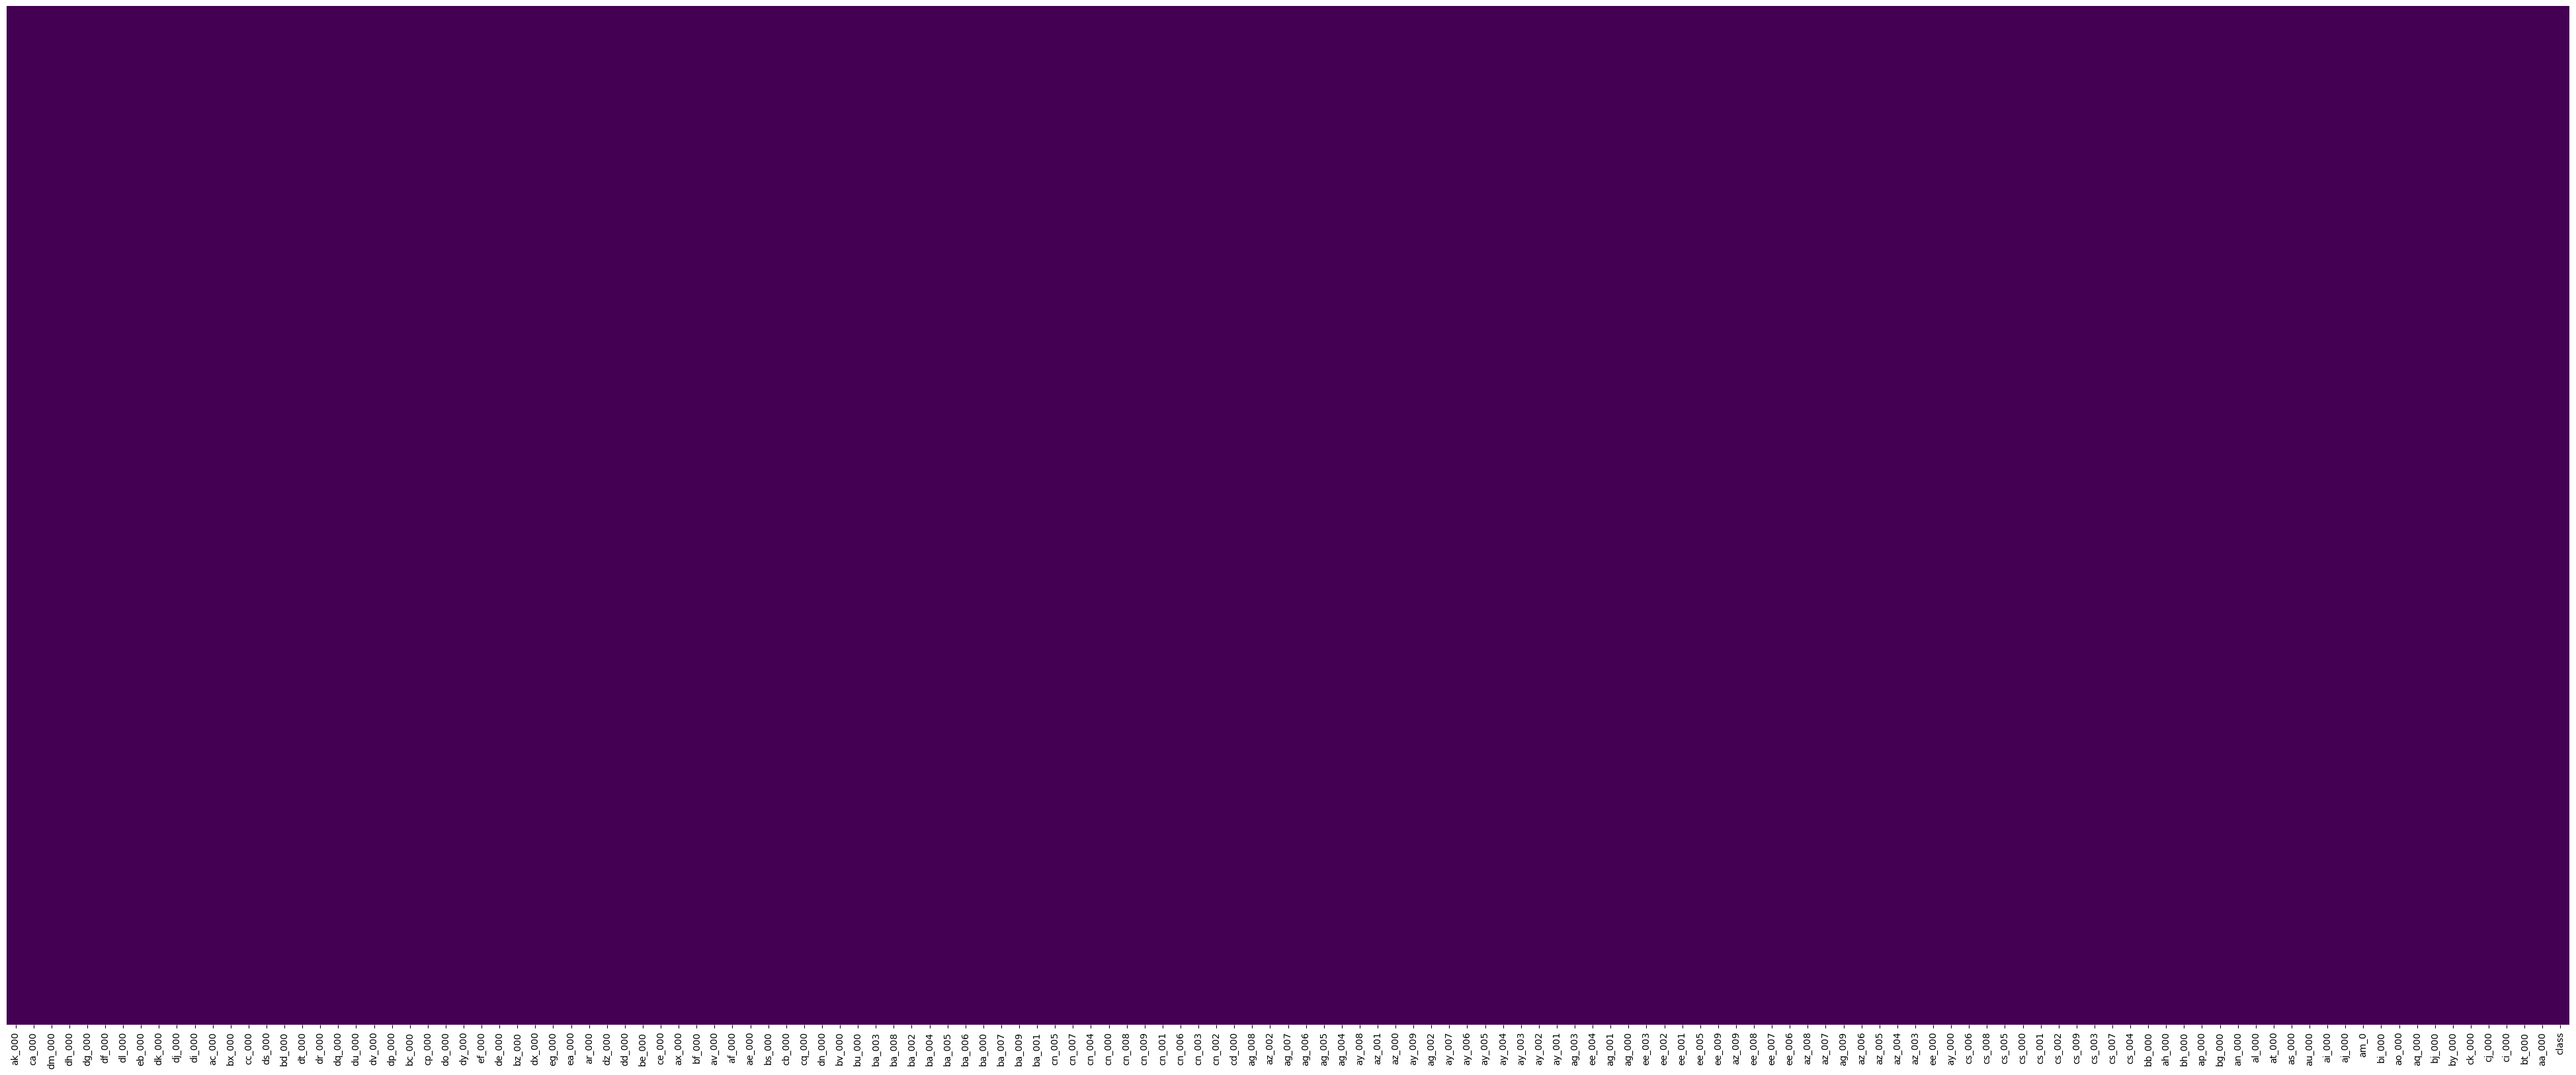

In [24]:
plt.figure(figsize=(50, 20))

# heatmap
sns.heatmap(df_no_nulls.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As previously shown, we successfully obtained a dataset without missing values by removing 5,857 rows, which corresponds to 9.7% of the total, and 28 columns, representing 16.4% of the total. Now, we will use this clean dataset for modeling and attempt to predict the outcomes.

In [25]:
df_pp = df_no_nulls.copy()

# Data Processing

In [26]:
# Separate independent variables (X) and dependent variable (y)
X = df_pp.drop('class', axis=1)
y = df_pp['class']

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Standardize
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res) 
X_test = scaler.transform(X_test)


## Random Forest

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

### Confusion Matrix RF

In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[16084    37]
 [   43    79]]


### Classification Report RF

In [30]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16121
           1       0.68      0.65      0.66       122

    accuracy                           1.00     16243
   macro avg       0.84      0.82      0.83     16243
weighted avg       0.99      1.00      1.00     16243



### AUC Score RF

In [31]:
print("Random Forest AUC Score:", roc_auc_score(y_test, y_pred))

Random Forest AUC Score: 0.8226229203126764


## Gradient Boost

In [32]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

xgb_pred = xgb_model.predict(X_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)

### Confusion Matrix GB

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

Confusion Matrix:
[[16092    29]
 [   24    98]]


### Classification Report GB

In [34]:
print("Classification Report:")
print(classification_report(y_test, xgb_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16121
           1       0.77      0.80      0.79       122

    accuracy                           1.00     16243
   macro avg       0.89      0.90      0.89     16243
weighted avg       1.00      1.00      1.00     16243



### AUC Score GB

In [35]:
print("Gradient Boost AUC Score:", xgb_roc_auc)

Gradient Boost AUC Score: 0.9007398963372284


## Naive Bayes

In [36]:
gnb = GaussianNB()

gnb.fit(X_train_res, y_train_res)

y_pred = gnb.predict(X_test)

### Confusion Matrix NB

In [37]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[15629   492]
 [   12   110]]


### Classification Report NB:

In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     16121
           1       0.18      0.90      0.30       122

    accuracy                           0.97     16243
   macro avg       0.59      0.94      0.64     16243
weighted avg       0.99      0.97      0.98     16243



### AUC Score NB

In [39]:
print("Naive Bayes AUC Score:", roc_auc_score(y_test, y_pred))

Naive Bayes AUC Score: 0.9355600728507057


# Analysis of Prediction Models

Let's analyze the three models (Random Forest, Gradient Boosting, and Naive Bayes) based on the provided metrics and discuss which one is most suitable for predicting the data. We will consider the following metrics:

- **Precision**
- **Recall**
- **F1-Score**
- **Accuracy**
- **ROC AUC Score**
- **Confusion Matrix**

## Metrics Analysis

### Random Forest

**Confusion Matrix:**
- True Negatives (TN): 16,084
- False Positives (FP): 37
- False Negatives (FN): 43
- True Positives (TP): 79

**Classification Report:**
- Precision (Class 0): 1.00
- Precision (Class 1): 0.68
- Recall (Class 0): 1.00
- Recall (Class 1): 0.65
- F1-Score (Class 0): 1.00
- F1-Score (Class 1): 0.66
- Accuracy: 1.00
- Macro Avg: Precision 0.84, Recall 0.82, F1-Score 0.83
- Weighted Avg: Precision 0.99, Recall 1.00, F1-Score 1.00

**ROC AUC Score:** 0.8226

### Gradient Boosting

**Confusion Matrix:**
- True Negatives (TN): 16,092
- False Positives (FP): 29
- False Negatives (FN): 24
- True Positives (TP): 98

**Classification Report:**
- Precision (Class 0): 1.00
- Precision (Class 1): 0.77
- Recall (Class 0): 1.00
- Recall (Class 1): 0.80
- F1-Score (Class 0): 1.00
- F1-Score (Class 1): 0.79
- Accuracy: 1.00
- Macro Avg: Precision 0.89, Recall 0.90, F1-Score 0.89
- Weighted Avg: Precision 1.00, Recall 1.00, F1-Score 1.00

**ROC AUC Score:** 0.9007

### Naive Bayes

**Confusion Matrix:**
- True Negatives (TN): 15,629
- False Positives (FP): 492
- False Negatives (FN): 12
- True Positives (TP): 110

**Classification Report:**
- Precision (Class 0): 1.00
- Precision (Class 1): 0.18
- Recall (Class 0): 0.97
- Recall (Class 1): 0.90
- F1-Score (Class 0): 0.98
- F1-Score (Class 1): 0.30
- Accuracy: 0.97
- Macro Avg: Precision 0.59, Recall 0.94, F1-Score 0.64
- Weighted Avg: Precision 0.99, Recall 0.97, F1-Score 0.98

**ROC AUC Score:** 0.9356

## Discussion and Best Model Selection

### Precision (Class 1):
- **Gradient Boosting** has the highest precision for Class 1 (0.77), followed by **Random Forest** (0.68) and **Naive Bayes** (0.18).

### Recall (Class 1):
- **Naive Bayes** has the highest recall for Class 1 (0.90), followed by **Gradient Boosting** (0.80) and **Random Forest** (0.65).

### F1-Score (Class 1):
- **Gradient Boosting** has the highest F1-Score for Class 1 (0.79), followed by **Random Forest** (0.66) and **Naive Bayes** (0.30).

### Accuracy:
- All models have high accuracy, with **Gradient Boosting** and **Random Forest** reaching 1.00 and **Naive Bayes** achieving 0.97.

### ROC AUC Score:
- **Naive Bayes** (0.9356) has the highest ROC AUC Score, followed by **Gradient Boosting** (0.9007) and **Random Forest** (0.8226).

### Confusion Matrix:
- **Gradient Boosting** and **Naive Bayes** have fewer false negatives (24 and 12, respectively) compared to **Random Forest** (43), indicating that they are better at identifying Class 1.

## Conclusion

Based on the above metrics, **Gradient Boosting** is the best model for predicting the data. Here’s why:

1. **High Precision and Recall:** Gradient Boosting strikes a good balance between precision (0.77) and recall (0.80) for Class 1, resulting in an F1-Score of 0.79. This indicates that the model is effective at correctly identifying Class 1 instances, minimizing both false positives and false negatives.
  
2. **ROC AUC Score:** Gradient Boosting has a high ROC AUC Score of 0.9007, indicating excellent class separation capabilities.

3. **Low False Negative Rate:** The Gradient Boosting model has only 24 false negatives, which is important for applications where accurately detecting Class 1 is critical.

## Model Selection

Therefore, **Gradient Boosting** is the recommended model for predicting the data due to its superior performance in terms of precision, recall, F1-Score, and ROC AUC Score, ensuring better detection of defects in the truck air system.

In [40]:
# Saving
joblib.dump(xgb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

# Model Application

## Data Processing

In [41]:
# loading
df_present_year = pd.read_csv('air_system_present_year.csv')

In [42]:
df_present_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [43]:
df_present_year = df_present_year.replace('na', np.nan)

df_present_year['class'] = df_present_year['class'].replace({'neg': 0, 'pos': 1})

In [44]:
object_columns = df_present_year.select_dtypes(include=['object']).columns

df_converted_new = df_present_year.copy()

for column in object_columns:
    df_converted_new[column] = convert_to_numeric(column)

print(df_converted_new.dtypes)

class       int64
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [45]:
df_reduced_new = df_converted_new[columns_to_keep]

In [46]:
df_reduced_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 143 entries, ak_000 to class
dtypes: float64(141), int64(2)
memory usage: 17.5 MB


<AxesSubplot:>

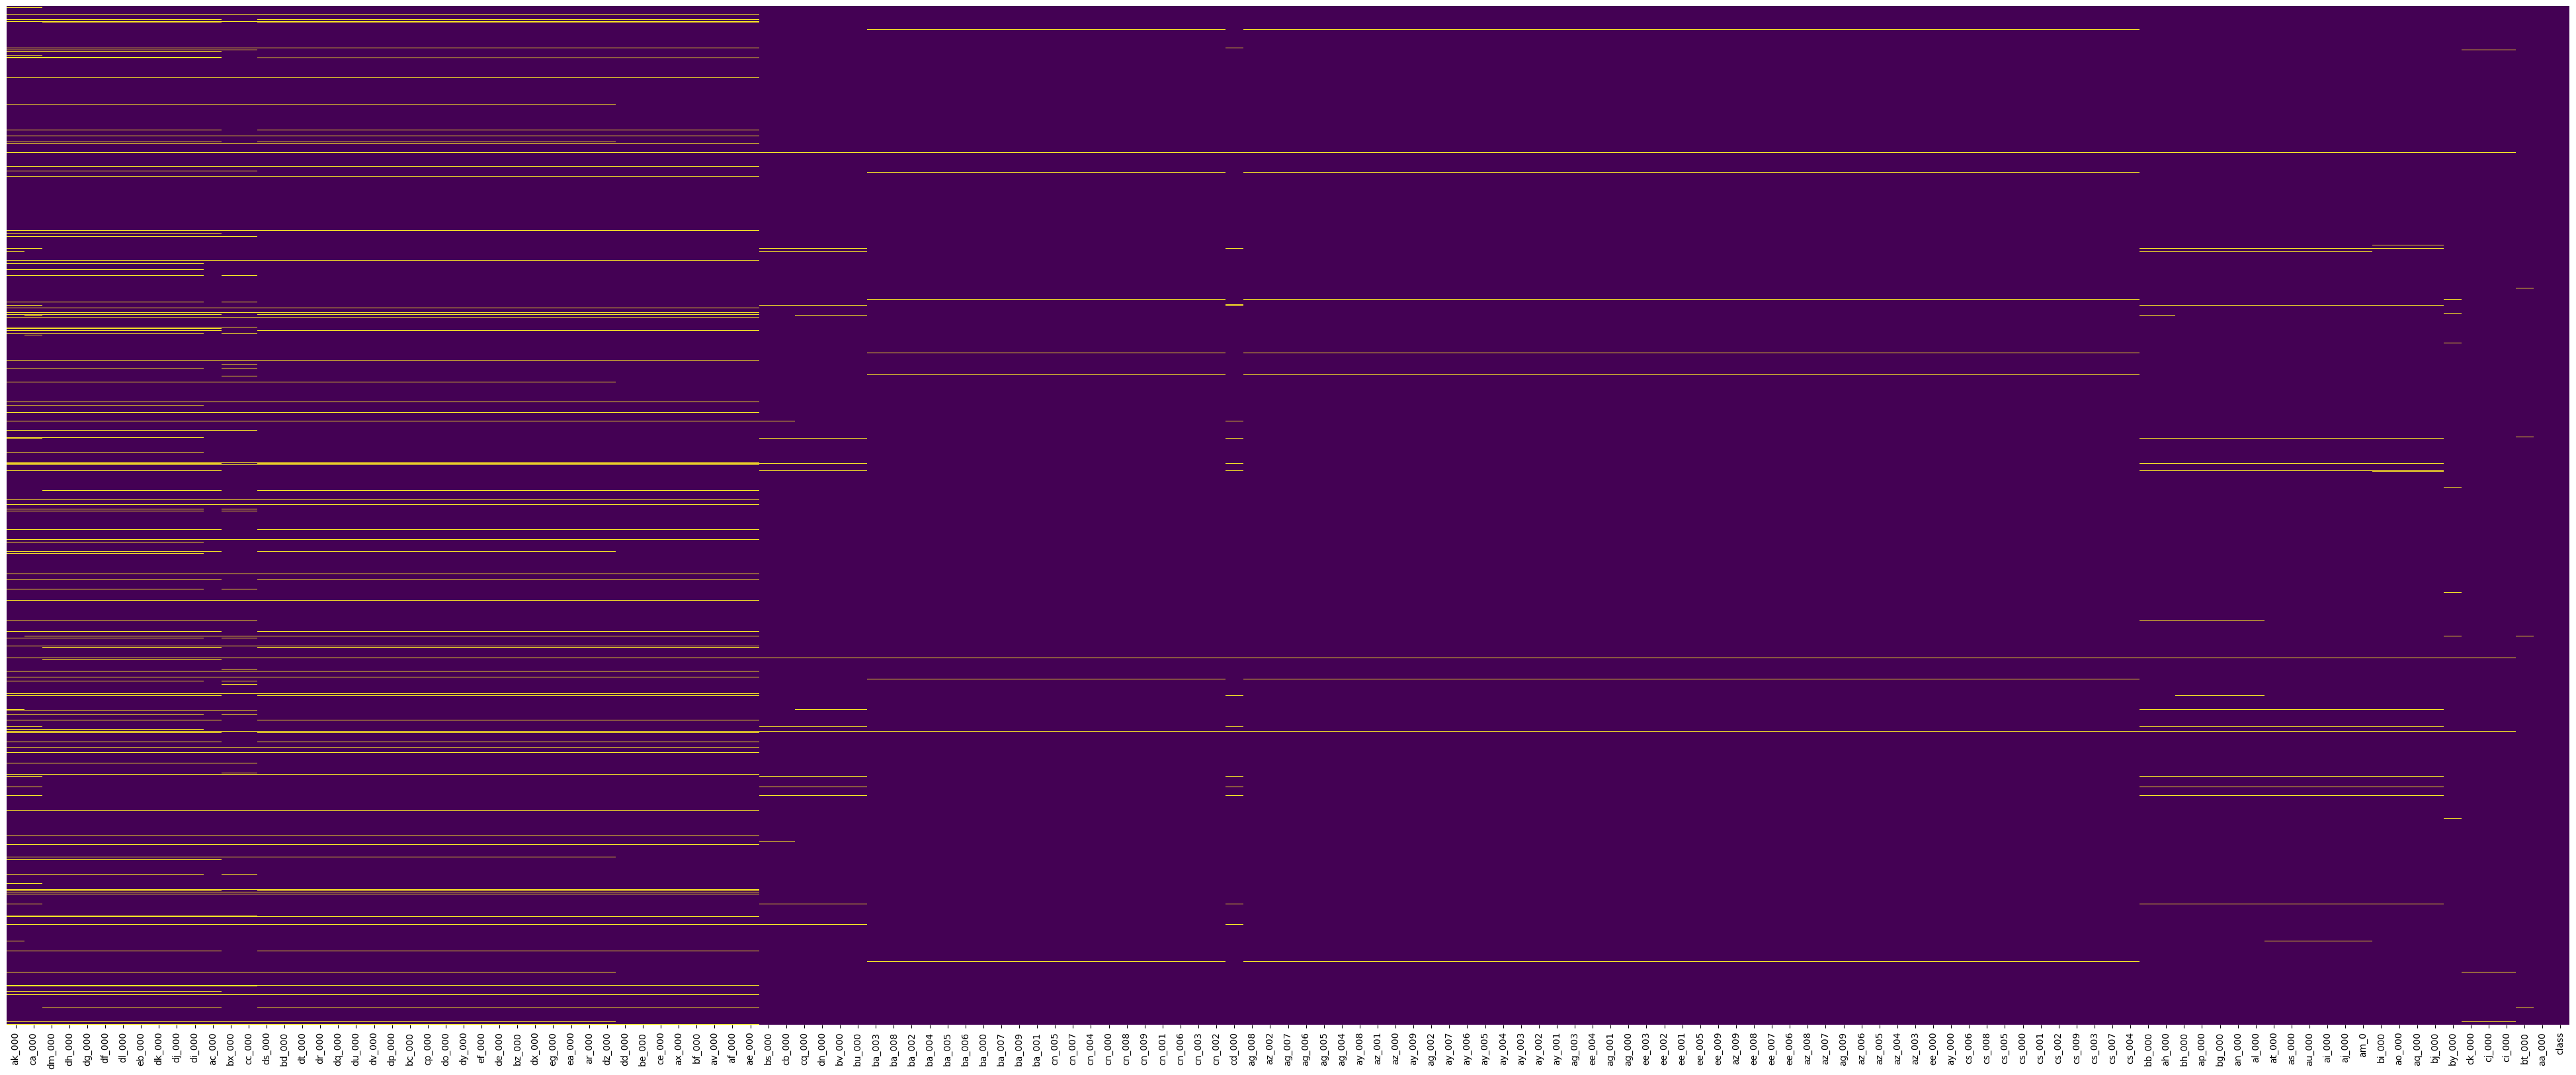

In [47]:
plt.figure(figsize=(50, 20))

# Plot do heatmap for columns
sns.heatmap(df_reduced_new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
# proportion of rows with null values
null_rows_proportion = df_reduced_new.isnull().any(axis=1).mean()
print(f"Proporção de linhas com valores nulos: {null_rows_proportion:.2f}")

Proporção de linhas com valores nulos: 0.10


In [49]:
df_no_nulls_2 = df_reduced_new.dropna()
# Number of rows after removing null values
print(f"Number of rows after removing null values: {len(df_no_nulls_2)}")

Number of rows after removing null values: 14344


## Model Application

In [50]:
# Separar variáveis independentes (X) e variável dependente (y)
X_new = df_no_nulls_2.drop('class', axis=1)
y_new = df_no_nulls_2['class'] 

# Padronizar os dados com o mesmo scaler usado anteriormente
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

In [51]:
# Carregar o modelo treinado 
model = joblib.load('gradient_boosting_model.pkl')

# Fazer previsões
y_pred_new = model.predict(X_new_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_new, y_pred_new))
print("\nClassification Report:")
print(classification_report(y_new, y_pred_new))
print("\nROC AUC Score:", roc_auc_score(y_new, y_pred_new))

Confusion Matrix:
[[    1 14004]
 [    0   339]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     14005
           1       0.02      1.00      0.05       339

    accuracy                           0.02     14344
   macro avg       0.51      0.50      0.02     14344
weighted avg       0.98      0.02      0.00     14344


ROC AUC Score: 0.500035701535166


For model training, SMOTE was used to balance the classes during the training phase. This procedure might be the reason for the model's unsatisfactory performance when tested on an imbalanced dataset. The model was trained with a balanced distribution, but it is being evaluated on the original data distribution, which could lead to biased predictions.

In light of this, we will save a Gradient Boosting model trained without the application of SMOTE for use in this stage. This will allow for a more accurate assessment of the model's performance on the original data distribution.

In [52]:
# Gradient Boosting without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# predictions
y_pred = model.predict(X_test_scaled)

# evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
[[16079    42]
 [   50    72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16121
           1       0.63      0.59      0.61       122

    accuracy                           0.99     16243
   macro avg       0.81      0.79      0.80     16243
weighted avg       0.99      0.99      0.99     16243


ROC AUC Score: 0.7937793184940526


In [53]:
# Saving
joblib.dump(model, 'gradient_boosting_model_no_smote.pkl')

['gradient_boosting_model_no_smote.pkl']

In [54]:
# Loading
model = joblib.load('gradient_boosting_model_no_smote.pkl')

y_pred_new = model.predict(X_new_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_new, y_pred_new))
print("\nClassification Report:")
print(classification_report(y_new, y_pred_new))
print("\nROC AUC Score:", roc_auc_score(y_new, y_pred_new))

Confusion Matrix:
[[13681   324]
 [  126   213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14005
           1       0.40      0.63      0.49       339

    accuracy                           0.97     14344
   macro avg       0.69      0.80      0.74     14344
weighted avg       0.98      0.97      0.97     14344


ROC AUC Score: 0.8025919946416102


## Feature Importance Scores

These scores indicate the extent to which each feature contributes to predicting a failure.

In [55]:
# feature importance scores
feature_importances = model.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

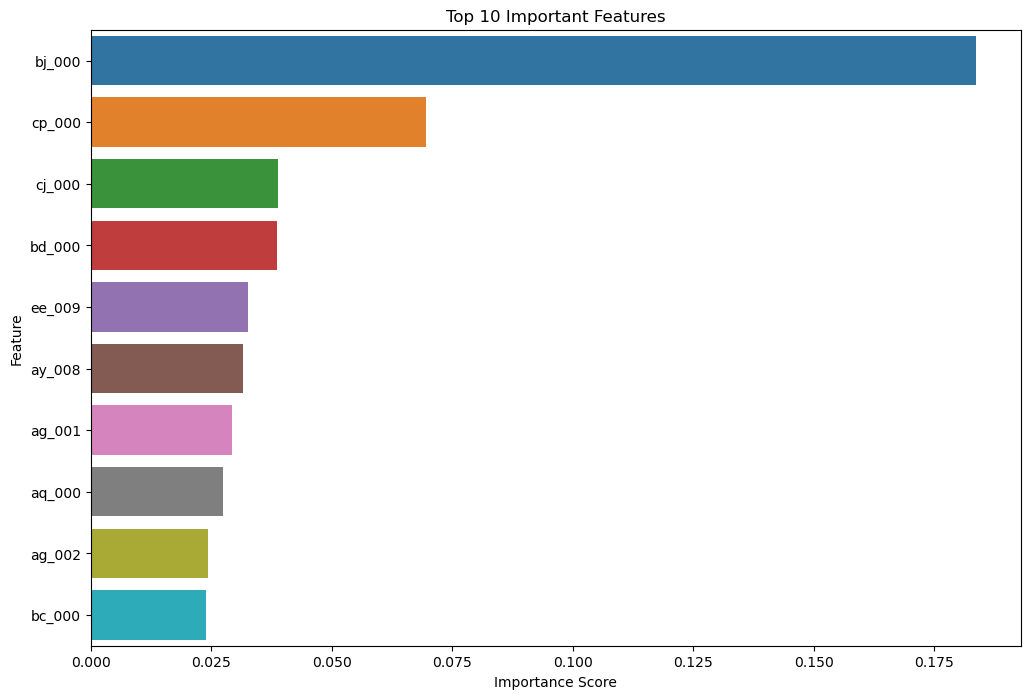

In [56]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Response to Key Questions from Project Managers

## Can we reduce our maintenance expenses using AI techniques?

Yes, AI techniques can significantly reduce maintenance expenses. Here's how we can achieve that:

1. **Predictive Maintenance:**
   - By using AI models to predict potential failures in the truck air system, we can shift from reactive to predictive maintenance. This approach allows us to address issues before they escalate, reducing the likelihood of costly repairs and minimizing unexpected breakdowns.

2. **Reduction of Unplanned Downtime:**
   - Predictive maintenance can greatly reduce unplanned downtime, which is typically more expensive due to emergency repairs and lost productivity. By scheduling maintenance during planned downtimes, we can optimize operational efficiency and minimize disruptions.

3. **Optimal Resource Allocation:**
   - AI models can prioritize maintenance tasks based on the predicted risk of system failure. This helps ensure that resources are allocated effectively, reducing labor costs and improving inventory management for spare parts.

To quantify these cost savings, we can:
- Track the reduction in both the frequency and cost of repairs before and after implementing the AI-based predictive model.
- Measure the decrease in unplanned downtime and the associated costs.
- Calculate the return on investment (ROI) by comparing the costs of implementing and maintaining the AI system with the savings from reduced maintenance expenses.

## Can you identify the main factors that indicate potential failures in the air system?

Yes, the AI model can identify the key factors that signal potential failures in the air system. Although the specific factors depend on the dataset and available features, the model ranks these based on their influence on system failures.

### Key Factors Indicating Potential Air System Failures

Based on the feature importance analysis of the Gradient Boosting model, the top 10 most influential features are: bj_000, cp_000, cj_000, bd_000, ee_009, ay_008, ag_001, aq_000, ag_002, and bc_000. These columns are currently encoded due to confidentiality agreements.

For a deeper understanding of these factors, we recommend collaborating with the technical team responsible for the air system data. This collaboration will help decode the feature names and provide critical context regarding their influence on system performance.

During discussions, we can explore how each of these factors is connected to potential failures in the air system. This will support a more detailed analysis and guide the development of targeted maintenance strategies to prevent costly breakdowns.

# Conclusion

## Objective

The goal of this challenge was to develop a machine learning model capable of predicting defects in the trucks' air system using historical data. Various preprocessing, training, and evaluation steps were performed to ensure the accuracy and effectiveness of the model.

## Methodology

1. **Data Preprocessing:**
   - 'na' values were replaced with NaN.
   - The 'class' column was converted to 0 (neg) and 1 (pos).
   - All columns were converted to numeric values.
   - Columns with a high proportion of null values were removed.
   - Rows with many null values were excluded.
   - The data was standardized using `StandardScaler`.

2. **Data Splitting:**
   - The data was split into training and testing sets with a 70/30 ratio.
   - Stratified splitting was applied to maintain the original class proportion.

3. **Model Training:**
   - Random Forest, Gradient Boosting, and Naive Bayes models were trained and evaluated.
   - The Gradient Boosting model without SMOTE was selected as the best model based on its ability to distinguish between classes and its performance metrics.

4. **Model Evaluation:**
   - The Gradient Boosting model was evaluated using a confusion matrix, classification report, and ROC AUC Score.

## Process Evaluation

The model development process included robust steps for preprocessing, training, and evaluation. The decision not to apply SMOTE during the final model's training phase was validated by the results, showing better performance without artificially balancing the classes.

## Suggestions for Improvement

1. **Feature Exploration:**
   - Explore adding more relevant features, such as temporal or contextual variables, to improve predictions.

2. **Alternative Balancing Techniques:**
   - Consider using class weighting during training as a more natural way to handle imbalanced data.

3. **Cross-Validation:**
   - Implement a more extensive cross-validation to ensure the model is not overfitting and performs consistently across different data subsets.

4. **Hyperparameter Tuning:**
   - Perform a more in-depth hyperparameter search using techniques like Grid Search or Random Search to further optimize the model.

## Cost Reduction

Although the model predicts classes 0 and 1, the provided columns are not labeled, which prevents direct cost-saving analysis based on individual features. However, the following suggestions outline how the analysis could approach cost reduction:

1. **Feature Identification and Labeling:**
   - If possible, obtain information about the meaning of the columns. Labeling the columns would allow a more detailed analysis of which features are associated with defects, helping to target areas for intervention.

2. **Preventive Maintenance:**
   - Use the model to identify trucks with a high probability of air system defects. Implement preventive maintenance for these trucks to avoid more expensive failures in the future.

3. **Continuous Monitoring:**
   - Implement continuous monitoring systems on trucks to collect real-time data. This can help identify patterns that precede failures, enabling proactive action.